Optimization terminated successfully.
         Current function value: 1.380810
         Iterations: 187
         Function evaluations: 302


/tmp/ipykernel_4227/3075325237.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=var, y='y', palette='viridis')


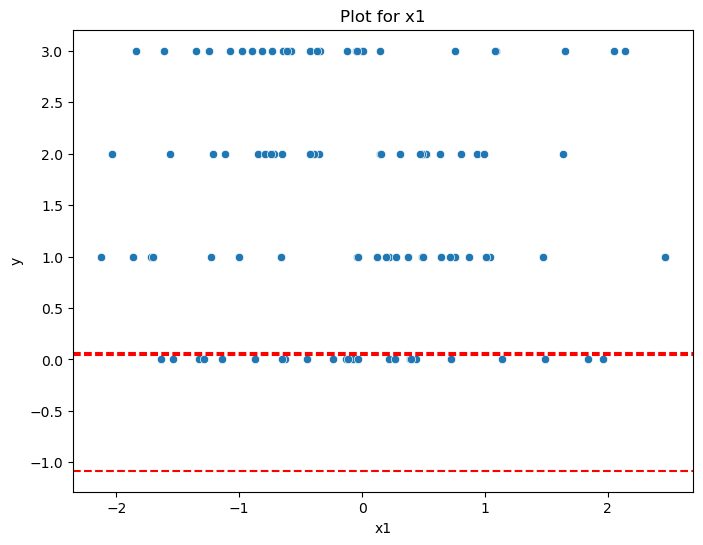

/tmp/ipykernel_4227/3075325237.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=var, y='y', palette='viridis')


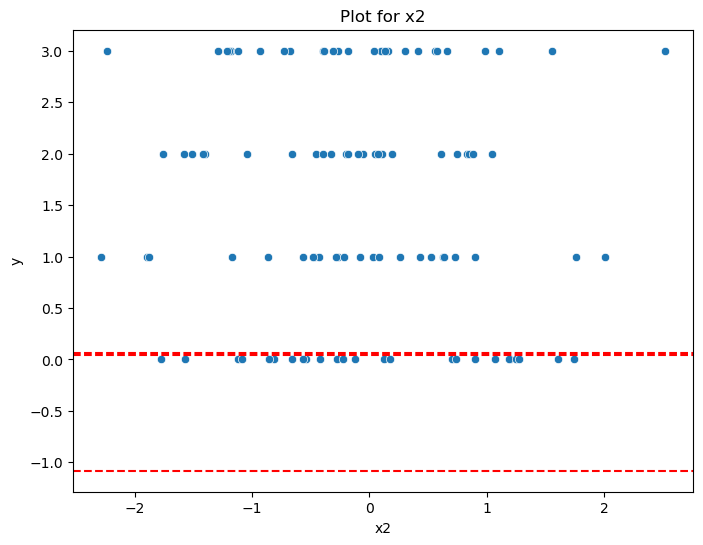

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Assume you have a DataFrame df with columns 'y', 'x1', and 'x2'
df = pd.DataFrame({
    'y': np.random.choice([0, 1, 2, 3], 100),
    'x1': np.random.normal(0, 1, 100),
    'x2': np.random.normal(0, 1, 100)
})

# Fit the ordinal logistic regression model
exog = df[['x1', 'x2']]
endog = df['y']
model = OrderedModel(endog, exog, distr='logit')
result = model.fit()

# Get the cut points (thresholds) from the model
num_thresholds = df['y'].nunique() - 1
cut_points = result.params[-num_thresholds:]

# Create separate plots for 'x1' and 'x2'
for var in ['x1', 'x2']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=var, y='y', palette='viridis')
    
    # Add horizontal lines for the cut points
    for cut_point in cut_points:
        plt.axhline(cut_point, color='red', linestyle='--')
    
    plt.title(f"Plot for {var}")
    plt.show()



In [16]:
cut_points

0/1   -1.081937
1/2    0.065665
2/3    0.040078
dtype: float64